# Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install textblob

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import chardet
from googletrans import Translator
from textblob import TextBlob
import random
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Replicability

In [34]:
def set_seed(seed_value):
    random.seed(seed_value)  # Python
    np.random.seed(seed_value)  # NumPy
    #tf.random.set_seed(seed_value)  # TensorFlow

set_seed(123)

# Data Import & Preprocessing

In [5]:
data_dir = "/content/drive/MyDrive/Edu/Data"
student_profile_dir = '/content/drive/MyDrive/Edu/student_profile.xls'
collected_df = pd.DataFrame()
columns_to_drop = ['所属行政班', '进入考试时间', '进入考试IP', '完成考试用时', '交卷时间', '提交考试IP', '得分 (总:50.0分)']
translator = Translator()
for file in os.listdir(data_dir):
  file_dir = os.path.join(data_dir, file)
  file_read = pd.read_excel(file_dir, header = 1)
  file_read = file_read.dropna()
  file_read['学号'] = file_read['学号'].astype(int)
  collected_df = pd.concat([collected_df, file_read], ignore_index = True)
  collected_df.reset_index(drop=True, inplace=True)

collected_df.drop(columns=columns_to_drop, inplace=True)
column_names = ['ID', 'Dept', 'Name', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']
collected_df.columns = column_names
collected_df['Q7_en'] = [translator.translate(x, src = 'zh-CN', dest = 'en').text for x in collected_df['Q7']]
collected_df['Q8_en'] = [translator.translate(x, src = 'zh-CN', dest = 'en').text for x in collected_df['Q8']]
collected_df['Q8_sent'] = ['positive' if TextBlob(x).sentiment.polarity > 0 else 'negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral' for x in collected_df['Q8_en']]
collected_df['Dept'] = ['Biotechnology' if dept == '生物技术' else 'Bioinformatics' if dept == '生物信息学' else 'Biotechnology' for dept in collected_df['Dept']]

stu_profile_df = pd.read_excel(student_profile_dir)
stu_profile_df['学号'] = stu_profile_df['学号'].astype(int)
stu_profile_df.columns = ['ID', 'Gender', 'Department', 'Major']

merged_df = pd.merge(collected_df, stu_profile_df, how = 'left', on = ['ID'])
merged_df['Gender'] = [translator.translate(x, src = 'zh-CN', dest = 'en').text for x in merged_df['Gender']]
merged_df.drop(columns=['Department', 'Major', 'Name'], inplace=True)

merged_df = merged_df[merged_df['ID'] != 20221309108]
merged_df.loc[:, 'Gender'].iloc[84] = 'male'
#collected_df.head(5)
#stu_profile_df.head(5)
#collected_df.to_csv('/content/drive/MyDrive/Edu/Data/agg_df.csv', header=True, index=False)
merged_df.to_csv('/content/drive/MyDrive/Edu/merged_df.csv', header = True, index = False)

<ipython-input-5-e64b36d619c7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_read['学号'] = file_read['学号'].astype(int)
<ipython-input-5-e64b36d619c7>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'Gender'].iloc[84] = 'male'


In [6]:
merged_df.head(5)

,ID,Dept,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q7_en,Q8_en,Q8_sent,Gender
0,20211303101,Biotechnology,A,A,A,A,A,A,讨论互动平台，一起交流,很方便,Discuss the interactive platform and communica...,very convenient,positive,male
1,20211303102,Biotechnology,A,A,A,B,B,A,可以添加电子版书籍，可以在上面批注,可以很好的签到，提前预习课程内容,"You can add electronic books, you can comment ...","You can sign in well, pre -pre -pre -preview t...",neutral,male
2,20211303104,Biotechnology,A,A,B,B,B,A,实验流程，实验操作步骤等,可以使同学们更方便更容易的查看实验课预习内容，实验后可以通过平台复习和巩固,"Experimental process, experimental operation s...",It can make students more convenient and easie...,positive,male
3,20211303105,Biotechnology,A,A,A,B,A,A,模拟实验,非常方便,Simulation experiment,Very convenient,positive,male
4,20211303106,Biotechnology,A,B,B,B,B,B,实验需要注意的地方,挺好的,Place you need to pay attention to,fine,positive,male


In [ ]:
Q7_chin_response = collected_df['Q7'].str.cat(sep = '')
# Open the file in write mode ('w')
with open('/content/drive/MyDrive/Edu/Q7_chin_response.txt', 'w') as file:
    # Write the string to the file
    file.write(Q7_chin_response)

Q8_chin_response = collected_df['Q8'].str.cat(sep = '')
with open('/content/drive/MyDrive/Edu/Q8_chin_response.txt', 'w') as file:
    # Write the string to the file
    file.write(Q8_chin_response)

# Topic modeling

In [20]:
topic_modeling_df = merged_df.loc[:, ['ID', 'Q7_en', 'Q8_en']].drop(merged_df.index[-1])
topic_modeling_df['Q7Q8'] = [(topic_modeling_df.loc[:, ['Q7_en', 'Q8_en']].iloc[i]).str.cat(sep = ' ') for i in range(topic_modeling_df.shape[0])]

In [21]:
topic_modeling_df.head(5)

,ID,Q7_en,Q8_en,Q7Q8
0,20211303101,Discuss the interactive platform and communica...,very convenient,Discuss the interactive platform and communica...
1,20211303102,"You can add electronic books, you can comment ...","You can sign in well, pre -pre -pre -preview t...","You can add electronic books, you can comment ..."
2,20211303104,"Experimental process, experimental operation s...",It can make students more convenient and easie...,"Experimental process, experimental operation s..."
3,20211303105,Simulation experiment,Very convenient,Simulation experiment Very convenient
4,20211303106,Place you need to pay attention to,fine,Place you need to pay attention to fine


Best C_V Coherence Score: 0.5269782565810768 (Num Topics: 3)


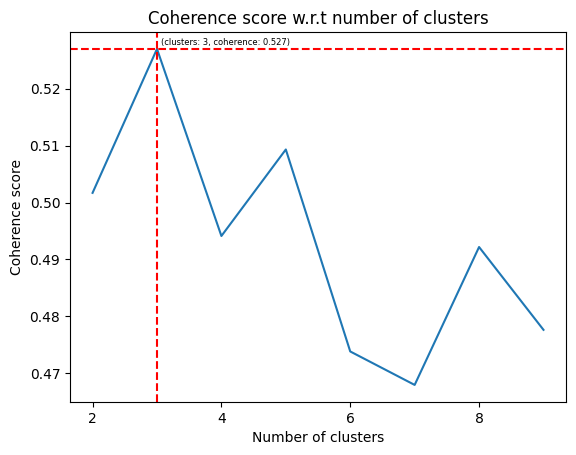

In [31]:
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

## for title, abstract, keywords combined
documents = topic_modeling_df['Q7Q8'].tolist()
documents = [word_tokenize(doc) for doc in documents]
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Create a CountVectorizer for converting the corpus into a term-document matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([" ".join(doc) for doc in documents])

# List to store coherence scores
coherence_scores_umass = []
coherence_scores_cv = []

# Specify a range of numbers of topics to evaluate
num_topics_range = range(2, 10)

for num_topics in num_topics_range:
    # Fit an LDA model
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary,
                                       passes = 10, alpha='auto', eta='auto')

    # Calculate C_V coherence score
    cv_coherence_model = CoherenceModel(model=lda_model, corpus=corpus, coherence='c_v', texts=documents, processes=1)
    cv_coherence = cv_coherence_model.get_coherence()
    coherence_scores_cv.append(cv_coherence)

# Find the number of topics with the highest C_V coherence score
best_cv_num_topics = num_topics_range[np.argmax(coherence_scores_cv)]

print(f"Best C_V Coherence Score: {max(coherence_scores_cv)} (Num Topics: {best_cv_num_topics})")

# plot number of cluster by coherence score diagram
def cluster_coherence(coherence_score, num_topic):
  fig, ax = plt.subplots()
  num_topics = list(num_topic)
  ax.plot(num_topics, coherence_score)
  custom_xticks = np.arange(min(num_topics),
                            max(num_topics) + 1, 2)
  ax.set_xticks(custom_xticks)
  vlabel = num_topics[np.argmax(coherence_score)]
  hlabel = round(max(coherence_score), 3)
  ax.axvline(x = vlabel, color = 'red', linestyle = '--', label = f'{vlabel}')
  ax.axhline(y = hlabel, color = 'red', linestyle = '--', label = f'{hlabel}')
  ax.annotate(f'(clusters: {vlabel}, coherence: {hlabel})', (vlabel, hlabel),
              textcoords="offset points", xytext=(3,3), ha='left', fontsize = 6)
  ax.set_title('Coherence score w.r.t number of clusters')
  ax.set_xlabel('Number of clusters')
  ax.set_ylabel('Coherence score')
  plt.show()

cluster_coherence(coherence_scores_cv, num_topics_range)

In [35]:
stop_words = set(stopwords.words('english')) # a, the, etc.
stop_words.update()
topic_modeling_df['token'] = [word_tokenize(entry) for entry in topic_modeling_df['Q7Q8']]
topic_modeling_df['token'] = [[char for char in token if char not in string.punctuation]
                                                for token in topic_modeling_df['token']] # remove punctuation marks
topic_modeling_df['token'] = [[char for char in token if char.isalpha()]
                                              for token in topic_modeling_df['token']] # remove all numerical values
topic_modeling_df['token'] = [[char.lower() for char in token] for token in topic_modeling_df['token']] # all words to lowercase
topic_modeling_df['token'] = [[word for word in token if word.lower() not in stop_words]
                                                for token in topic_modeling_df['token']] # remove stop words
# lemmatization
lemmatizer = WordNetLemmatizer()
topic_modeling_df['token'] = [[lemmatizer.lemmatize(char) for char in doc] for doc in topic_modeling_df['token']]
topic_modeling_df.head(5)

# construct corpus
topic_modeling_df['corpus'] = topic_modeling_df['token'].apply(' '.join)
# len = number of documents, the words vectorized that is contained in the document
corpus = topic_modeling_df['corpus'].tolist()
corpus = [word_tokenize(doc) for doc in corpus]

# construct Term-Document matrix (TDM) - TAK to article title
grouped_TDM = topic_modeling_df.groupby('ID')['corpus'].apply(' '.join).reset_index()
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(grouped_TDM['corpus'])
tdm = tdm.toarray()

# TF-IDF for TDM
transformer = TfidfTransformer()
tfidf_tdm = transformer.fit_transform(tdm)
tfidf_tdm = tfidf_tdm.toarray()

# LDA for topic modeling
# Number of topics you want to extract
n_topics = 3

lda = LatentDirichletAllocation(n_components=n_topics, random_state=123)
# obtain document-topic matrix
lda_result = lda.fit_transform(tfidf_tdm)

# Displaying topics and their top words
for idx, topic in enumerate(lda.components_): # each component correspond to a word in corpus
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    print("\n")

Topic 1:
['consolidate', 'lesson', 'classroom', 'increase', 'better', 'time', 'test', 'practice', 'review', 'well', 'advance', 'content', 'add', 'virtual', 'video', 'class', 'step', 'experimental', 'fine', 'experiment']


Topic 2:
['effective', 'help', 'okay', 'preview', 'video', 'test', 'group', 'think', 'knowledge', 'add', 'teacher', 'question', 'student', 'learn', 'function', 'convenient', 'online', 'follow', 'good', 'exercise']


Topic 3:
['platform', 'rain', 'operation', 'enthusiasm', 'time', 'classroom', 'pretty', 'class', 'improve', 'analysis', 'experimental', 'help', 'post', 'good', 'continue', 'student', 'convenient', 'hope', 'easy', 'increase']




# Word Cloud

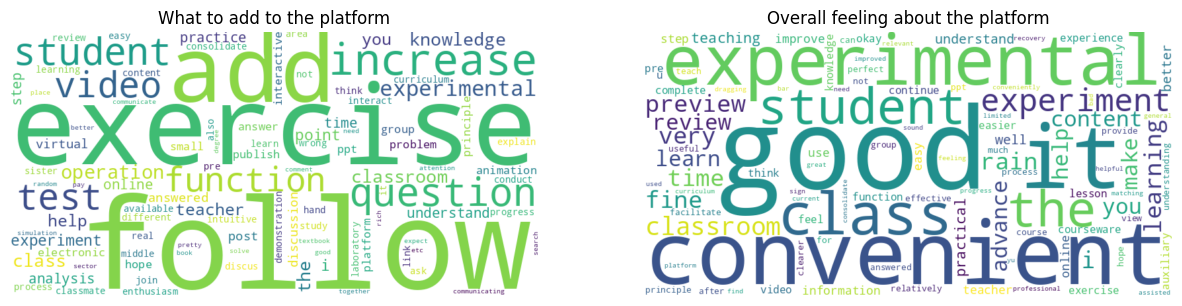

In [16]:
res7 = collected_df['Q7_en'].str.cat(sep=' ')
res7_token = word_tokenize(res7)
final_res7 = [word for word in res7_token if word not in string.punctuation]
final_res7 = [word for word in final_res7 if word not in stopwords.words('english')]
final_res7 = [word for word in final_res7 if word.isalpha()]
final_res7 = [word.lower() for word in final_res7]
lemmatizer = WordNetLemmatizer()
final_res7 = [lemmatizer.lemmatize(word) for word in final_res7]
final_res7_freq = nltk.FreqDist(final_res7)
#final_res_freq.most_common(10)
wordcloud7 = WordCloud(width=800, height=400, background_color="white", max_words = 100).generate_from_frequencies(final_res7_freq)

res8 = collected_df['Q8_en'].str.cat(sep=' ')
res8_token = word_tokenize(res8)
final_res8 = [word for word in res8_token if word not in string.punctuation]
final_res8 = [word for word in final_res8 if word not in stopwords.words('english')]
final_res8 = [word for word in final_res8 if word.isalpha()]
final_res8 = [word.lower() for word in final_res8]
lemmatizer = WordNetLemmatizer()
final_res8 = [lemmatizer.lemmatize(word) for word in final_res8]
final_res8_freq = nltk.FreqDist(final_res8)
#final_res_freq.most_common(10)
wordcloud8 = WordCloud(width=800, height=400, background_color="white", max_words = 100).generate_from_frequencies(final_res8_freq)

# Display the WordCloud using matplotlib
fig, axs = plt.subplots(1, 2, figsize = (15, 10), gridspec_kw={'wspace': 0.2})
axs[0].imshow(wordcloud7, interpolation="bilinear")
axs[0].set_title("What to add to the platform")
axs[0].axis("off")
axs[1].imshow(wordcloud8, interpolation="bilinear")
axs[1].set_title("Overall feeling about the platform")
axs[1].axis("off")

plt.show()

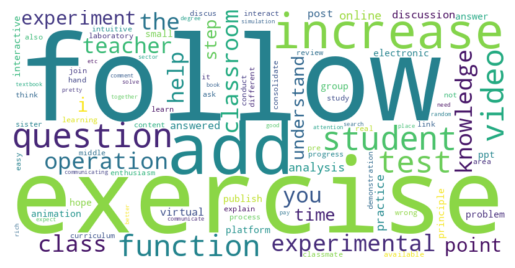

In [17]:
res7 = collected_df['Q7_en'].str.cat(sep=' ')
res7_token = word_tokenize(res7)
final_res7 = [word for word in res7_token if word not in string.punctuation]
final_res7 = [word for word in final_res7 if word not in stopwords.words('english')]
final_res7 = [word for word in final_res7 if word.isalpha()]
final_res7 = [word.lower() for word in final_res7]
lemmatizer = WordNetLemmatizer()
final_res7 = [lemmatizer.lemmatize(word) for word in final_res7]
final_res7_freq = nltk.FreqDist(final_res7)
#final_res_freq.most_common(10)
wordcloud7 = WordCloud(width=800, height=400, background_color="white", max_words = 100).generate_from_frequencies(final_res7_freq)

plt.imshow(wordcloud7, interpolation="bilinear")
#plt.set_title("What to add to the platform")
plt.axis("off")
plt.show()

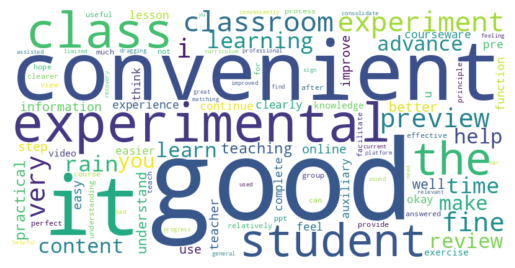

In [18]:
res8 = collected_df['Q8_en'].str.cat(sep=' ')
res8_token = word_tokenize(res8)
final_res8 = [word for word in res8_token if word not in string.punctuation]
final_res8 = [word for word in final_res8 if word not in stopwords.words('english')]
final_res8 = [word for word in final_res8 if word.isalpha()]
final_res8 = [word.lower() for word in final_res8]
lemmatizer = WordNetLemmatizer()
final_res8 = [lemmatizer.lemmatize(word) for word in final_res8]
final_res8_freq = nltk.FreqDist(final_res8)
#final_res_freq.most_common(10)
wordcloud8 = WordCloud(width=800, height=400, background_color="white", max_words = 100).generate_from_frequencies(final_res8_freq)

plt.imshow(wordcloud8, interpolation="bilinear")
#plt.set_title("Overall feeling about the platform")
plt.axis("off")
plt.show()